[View in Colaboratory](https://colab.research.google.com/github/wfus/playground/blob/master/HW1.ipynb)

# Problem Set 1: A Normal PSet

Name: William Fu
 
E-Mail: wfu@college.harvard.edu

There is a mathematical component and a programming component to this homework. Please submit a PDF export of this notebook Canvas. If a question requires you to make any plots, please include those in the writeup.

In [136]:
# Initialize notebook.
!pip install -qU plotly torch daft
!rm -fr start; git clone --single-branch -b demos2018 -q https://github.com/harvard-ml-courses/cs281-demos start; cp -f start/cs281.py cs281.py
import cs281
from plotly.offline import iplot
import daft

(Run to initialize math commands)
$$
\newcommand{\given}{\,|\,}
\newcommand{\R}{\mathbb{R}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\var}{\text{var}}
\newcommand{\cov}{\text{cov}}
\newcommand{\N}{\mathcal{N}}
\newcommand{\ep}{\varepsilon}
\newcommand{\Dir}{\text{Dirichlet}}
\newcommand{\indicator}{\mathbb{1}}
$$

## Problem 1 - A Classic on the Gaussian Algebra
[10pts]
Let $X$ and $Y$ be independent univariate Gaussian random variables. In the previous problem set, you likely used the closure property that $Z = X + Y$ is also a Gaussian random variable. Here you'll prove this fact.


1) Suppose $X$ and $Y$ have mean 0 and variances $\sigma_X^2$ and $\sigma_Y^2$ respectively. Write the pdf of $X + Y$ as an integral.

2) Evaluate the integral from the previous part to find a closed-form expression for the pdf of $X+Y$, then argue that this expression implies that $X+Y$ is also Gaussian with mean $0$ and variance $\sigma_X^2 + \sigma_Y^2$. 

Hint: what is the integral, over the entire real line, of,
$$ f(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{1}{2\sigma^2}(x - \mu)^2 \right),$$
i.e., the pdf of a univariate Gaussian random variable?

3) Extend the above result to the case in which $X$ and $Y$ may have arbitrary means.


### Student Answer

#### Part 1

Let $Z = X + Y$. Since we are working with random variables, the sum of two random variables creates a new PDF that is the convolution of the two original PDFs. Therefore, the PDF of $Z$ will be (Letting the gaussians be zero centered)
\begin{align*}
p_z
&= p_x * p_y \\
&= \int p_x(z) p_z(x - z) dz \\
&= \int \frac{1}{\sqrt{2\pi}\sigma_x} \exp\left( -\frac{1}{2\sigma_x^2}(z - \mu_x)^2 \right) \frac{1}{\sqrt{2\pi}\sigma_y} \exp\left( -\frac{1}{2\sigma_y^2}(x - z - \mu_y)^2 \right) dz \\
&= \int \frac{1}{\sqrt{2\pi}\sigma_x} \exp\left( -\frac{z^2}{2\sigma_x^2} \right) \frac{1}{\sqrt{2\pi}\sigma_y} \exp\left( -\frac{(x - z)^2}{2\sigma_y^2} \right) dz
\end{align*}

#### Part 2

Now we will evaluate the integral directly.

\begin{align*}
& \int \frac{1}{\sqrt{2\pi}\sigma_x} \exp\left( -\frac{z^2}{2\sigma_x^2} \right) \frac{1}{\sqrt{2\pi}\sigma_y} \exp\left( -\frac{(x - z)^2}{2\sigma_y^2} \right) dz \\
&= 
\frac{1}{2\pi \sigma_x \sigma_y} \int \exp\left( -\frac{z^2}{2\sigma_x^2} -\frac{(x - z)^2}{2\sigma_y^2}\right) dz \\
&=
\frac{1}{2\pi \sigma_x \sigma_y} \int \exp\left( -\frac{z^2}{2\sigma_x^2} -\frac{(x - z)^2}{2\sigma_y^2}\right) dz \\
&=
\frac{1}{2\pi \sigma_x \sigma_y} \int \exp\left( -\frac{z^2}{2\sigma_x^2} -\frac{(x - z)^2}{2\sigma_y^2}\right) dz \\
&= \frac{1}{2\pi \sigma_x \sigma_y} \int \exp\left( -\frac{1}{2 \sigma_x^2 \sigma_y^2} \left ( (\sigma_x^2 + \sigma_y^2) z^2 - 2 \sigma_x^2 x z + \sigma_x^2 x^2\right )\right) dz
\end{align*}
Let $\sigma_z^2 = \sigma_x^2 + \sigma_y^2$ to clean up the notation a little bit.

\begin{align*}
& \frac{1}{2\pi \sigma_x \sigma_y} \int \exp\left(-\frac{1}{2 \sigma_x^2 \sigma_y^2} \left (\sigma_x^2 + \sigma_y^2) z^2 - 2 \sigma_x^2 x z + \sigma_x^2 x^2\right )\right) dz \\
&= \frac{1}{2\pi \sigma_x \sigma_y} \int \exp\left(-\frac{\sigma_z^2}{2 \sigma_x^2 \sigma_y^2} \left (z^2 - 2 \frac{\sigma_x^2 x z}{\sigma_z^2} + \frac{\sigma_x^2 x^2}{\sigma_z^2}\right )\right) dz \\
&= \frac{1}{2\pi \sigma_x \sigma_y} \int \exp\left(-\frac{\sigma_z^2}{2 \sigma_x^2 \sigma_y^2} \left ( 
\left (z -  \frac{\sigma_x^2 x}{\sigma_z^2} \right)^2
+ \frac{\sigma_x^4 - \sigma_x^2 \sigma_z^2 }{\sigma_z^4}x^2 \right )\right) dz \\
&= \frac{1}{2\pi \sigma_x \sigma_y} \exp\left( \frac{x^2}{2\sigma_z^2} \right)\int \exp\left(-\frac{\sigma_z^2}{2 \sigma_x^2 \sigma_y^2} \left ( 
\left (z -  \frac{\sigma_x^2 x}{\sigma_z^2} \right)^2 \right )\right) dz
\end{align*}
Note that the integral is just a gaussian, so if we put in the correct normalization factor, the integral over all space of it goes to 1. We'll use the factors from outside and put them back in.
$$\boxed{\frac{1}{\sqrt{2\pi}\sigma_z} \exp\left( - \frac{x^2}{2 \sigma_z^2}\right)}
$$

Since $p_z$ takes on the form of a Gaussian, it is just a guassian with mean $0$ and standard deviation $\sigma_z = \sqrt{\sigma_x^2 + \sigma_y^2}$.

#### Part 3

We can directly evaluate this integral. Since we are now assuming that we can have arbitrary means for both of our Gaussians, we have to include back our $\mu$ terms. The process is essentially the same though, we just complete the square again except with extra terms. Again, let us define $\sigma_z^2 = \sigma_x^2 + \sigma_y^2$ again and now let $\mu_z = \mu_x + \mu_y$. 
\begin{align*}
& \int \frac{1}{\sqrt{2\pi}\sigma_x} \exp\left( -\frac{1}{2\sigma_x^2}(z - \mu_x)^2 \right) \frac{1}{\sqrt{2\pi}\sigma_y} \exp\left( -\frac{1}{2\sigma_y^2}(x - z - \mu_y)^2 \right) dz \\ 
&= \frac{1}{2\pi \sigma_x \sigma_y} \int \exp\left( -\frac{1}{2\sigma_x^2}(z - \mu_x)^2 -\frac{1}{2\sigma_y^2}(x - z - \mu_y)^2\right) dz \\
&= \frac{1}{2\pi \sigma_x \sigma_y} \int \exp\left( -\frac{z^2 - 2 \mu_x z + \mu_x^2}{2\sigma_x^2} - \frac{x^2 + z^2 + \mu_y^2 - 2 x z - 2 x \mu_y + 2 z \mu_y }{2\sigma_y^2}\right) dz \\
&= \frac{1}{2\pi \sigma_x \sigma_y} \int 
\exp\left( -\frac{1}{2} \left ( (\sigma_x^2 + \sigma_y^2) z^2 + 2(\mu_y \sigma_x^2 - \mu_x \sigma_y^2 - x \sigma_x^2)z + \mu_x^2 \sigma_y^2 + \mu_y^2 \sigma_x^2 + \sigma_x^2 x^2 - 2x\mu_y \sigma_x^2 \right)\right) dz \\
&= \frac{1}{2\pi \sigma_x \sigma_y} \int 
\exp\left( -\frac{\sigma_z^2}{2 \sigma_x^2 \sigma_y^2} 
\left ( \left( z^2 - \frac{\sigma_x^2(x - \mu_y) + \sigma_y^2 \mu_x}{\sigma_z^2}\right)^2 + \frac{\sigma_x^2 ( x - \mu_y)^2  + \mu_x^2 \sigma_y^2}{\sigma_z^2}  - \left( \frac{\sigma_x^2(x - \mu_y) + \mu_x\sigma_y^2}{\sigma_z^2} \right)^2 \right)
\right) dz \\
\end{align*}

Again, since $z$ is the variable of integration we move all of the $x$ terms outside of the integral, and move in the correct normalization constant inside to ensure that the integral will evaluate to $1$. Thus, the final answer is
$$\boxed{\frac{1}{\sqrt{2\pi} \sigma_z} \exp\left( -\frac{(z - \mu_z)^2}{2 \sigma_z^2}\right)}$$

## Problem 2 - MAP Linear Regression 
[13pts]
Suppose that $X \in \R^{n \times m}$ with $n \geq m$ and $Y \in \R^n$, and that $Y \sim \N(Xw, \sigma^2 I)$. If we treat $w, \sigma^2, X$ as deterministic variables, the maximum likelihood estimate $\hat{w}$ of ${w}$ is given by the closed form solution,
$$ \hat{w} = (X^TX)^{-1}X^TY $$

1) Why do we need to assume that $n \geq m$?

2)  Write down the log-likelihood of the $Y$ Compute the gradient with respect to ${w}$ of the log-likelihood implied by the model above, assuming we have observed $Y$ and $X$. 

3) Suppose we now assume that ${w}$ is a random variable. We now have to specify $p(w)$, and an easy choice is ${w} \sim \N(0, \tau^2 I)$. Show that the "MAP estimate"  i.e. the argmax value of ${w}$ given $Y$, in this context is
$$\hat {w}_{MAP} = (X^TX + \lambda I)^{-1}X^T Y $$
where $\lambda = \sigma^2 / \tau^2$. (You may employ our standard linear-Gaussians technique without proof in your solution.)

Estimating ${w}$ in this way is called _ridge regression_ because the matrix $\lambda I$ looks like a "ridge". Ridge regression is a common form of _regularization_ that is used to avoid the overfitting that happens when the sample size is close to the output dimension in linear regression.

4)  Do we need $n \geq m$ to do ridge regression? Why or why not?

5) Show that ridge regression is equivalent to adding pseudo-observations. In particular $m$ additional rows to $X$ where the $j$-th additional row has its $j$-th entry equal to $\sqrt{\lambda}$ and all other entries equal to zero, adding $m$ corresponding additional entries to $Y$ that are all 0, and then computing the maximum likelihood estimate of ${w}$ using the modified $X$ and $Y$.



###Student Answer

#### Part 1

We need to assume that $n \ge m$ because otherwise, there will be eigenvalues of zero for the term $(X^T X)$ if $m>0$, which we showed in the last problem set. If that term has zeros as eigenvalues, it will not be invertable, which is bad since we are taking the inverse.

#### Part 2

Suppose that we have observed $Y$ and $X$. Then, the likelihood is just
\begin{align*}
\text{Likelihood}
&= p(y | X, w) \\
&= \prod_i \mathcal{N} (y_i | x_i w, \sigma^2)\\
\end{align*}
Then, taking the log, we have the log likelihood as
\begin{align*}
l
&= \log \left( \prod_i \mathcal{N} (y_i | x_i w, \sigma^2) \right) \\
&= -N \log  \sigma  - \frac{N}{2}\log 2 \pi  - \frac{1}{2\sigma^2}  \sum_{i=1}^N (y_i - x_i w)^2
\end{align*}
Then, we can directly take the gradient with respect to w.
\begin{align*}
\nabla_w l
&= \nabla_w \left( -N \log  \sigma  - \frac{N}{2}\log 2 \pi  - \frac{1}{2\sigma^2}  \sum_{i=1}^N (y_i - x_i w)^2 \right) \\
&= \nabla_w \left(- \frac{1}{2\sigma^2}  \sum_{i=1}^N (y_i - x_i w)^2 \right) \\
&= - \frac{1}{\sigma^2}  \sum_{i=1}^N (y_i - x_i w) x_i
\end{align*}

#### Part 3

Suppose now that $w$ is drawn from $w \sim \mathcal{N}(0, \tau^2 I)$. Now, since $w$ is now drawn from a distribution we have
\begin{align*}
\text{Log Likelihood}
&= \log p(y | X, w) p(w) \\
&=  -N \log  \sigma  - \frac{N}{2}\log 2 \pi  - \frac{1}{2\sigma^2}  \sum_{i=1}^N (y_i - x_i w)^2  - \frac{1}{2\tau^2} \sum_{i=1}^N (w)^2 \\
&=  -N \log  \sigma  - \frac{N}{2}\log 2 \pi  - \sum_{i=1}^N \frac{(y_i - x_i w)^2   +\frac{\sigma^2}{\tau^2} w^2 }{2 \sigma^2} \\
&=  -N \log  \sigma  - \frac{N}{2}\log 2 \pi  - \sum_{i=1}^N \frac{(y_i - x_i w)^2   +\lambda w^2 }{2 \sigma^2} \\
\end{align*}
We can show that maximum a posteriori estimate for $w$ in essentially the same way as with regular linear regression. Rearranging the equation, and eliminating the negative, we want to find the $w_{MAP}$ that minimizes
$$ (y - X w)^2 + \lambda I w^2$$
Taking the gradient with respect to $w$,
\begin{align*}
\nabla_w l
&= \frac{1}{\sigma^2} \sum_{i=1}^N (y_i - x_i w) x_i + \lambda w \\
&= \frac{1}{\sigma^2}\left( - (\mathbf{y} - \mathbf{x} w)\mathbf{x} + \lambda I w \right)
\end{align*}
We se the gradient to zero and solve. We can rearrange this to get 
 \begin{align*}
 (\mathbf{y} - \mathbf{x} w)\mathbf{x} &= \lambda I w \\
 \mathbf{x}^T y  &= \mathbf{x}^T \mathbf{x}w  + \lambda I w \\
 w &= (\mathbf{x}^T \mathbf{x} + \lambda I)^{-1} \mathbf{x}^T \mathbf{y}
 \end{align*}
 We see that we retrieve that $w_{MAP}$ estimate as asked for in the problem statement.

#### Part 4

Now we do not need $n \ge m$. Adding a scaled version of the identity matrix now prevents us from running into the same problem as before, since any zero eigenvalues in $\mathbf{x}^T \mathbf{x}$ turn into eigenvalues $\lambda$ instead, which leaves our matrix invertable. 

#### Part 5

We can show that ridge regression is essentially like regular regression with additional observations of $\sqrt{\lambda}$ in the jth position. Consider what we are trying to minimize when we do regular MAP linear regression. The expression from the previous part was
$$ w_{MAP}  = \text{argmin}_w\sum_{i=1}^N (y_i - x_i w)^2$$
However, we are adding $m$ pseudo-observations where the $x_{N+i}$ observations just have $\sqrt{\lambda}$ in the $i$th position, with all of the $y_{N=i} = 0$. Then,
\begin{align*}
w_{MAP} 
&=\text{argmin}_w \sum_{i=1}^N (y_i - x_i w)^2 + \sum_{j=N}^{N+m} (y_j - x_j w)^2 \\
&=\text{argmin}_w \sum_{i=1}^N (y_i - x_i w)^2 + \sum_{j=N}^{N+m} (0 - \sqrt{\lambda_j} w_j)^2 \\
&=\text{argmin}_w \sum_{i=1}^N (y_i - x_i w)^2 + \lambda w^2 \\
&=\text{argmin}_w (\mathbf{y} - \mathbf{x} w)^2 + \lambda w^2
\end{align*}
which is equivalent to what we wanted to minimize for ridge regression.


## Problem 3 - Fusing Polls

[10pts]


Consider a toy election forecasting problem. Let $x$ be drawn from a univariate normal the true state of an election with deterministic mean and variance.  And let $y_1 \ldots y_M$ be the point predictions made by $M$ different polls. We will assume that these values are drawn from conditionally independent univariate normals with mean $x$. However we will also assume that due to difference in techniques and budgets, each poll has significantly different known, deterministic precision. 

1) Write down the probabilistic model described in this problem, naming each of the random and deterministic variables. Sketch out the graphical model. 

2) Given the outcome of each of the polls, compute the formula for the posterior inference: $$p(x | y_1, \ldots y_M).$$ How do the precision estimates come into play?  

3) As $M$ gets larger, how does it impact the distribution of $x$? How does this scale? 

4) Notable issues can emerge in polling when there are "correlated errors". What assumption made above does this change? Highlight the term in the posterior that is impacted. 




### Student Answer

#### Part 1

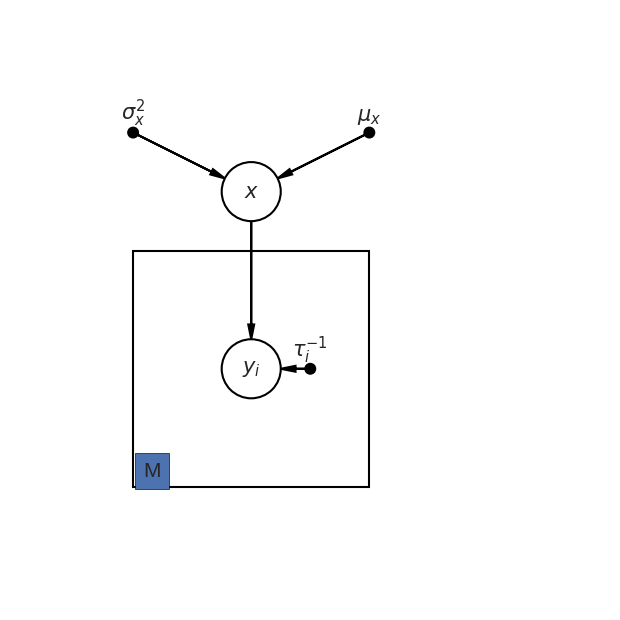

In [116]:
# Daft Template
pgm = daft.PGM([5, 5])
pgm.add_node(daft.Node("sigma", r"$\sigma_x^2$", 1, 4, fixed=True))
pgm.add_node(daft.Node("mux", r"$\mu_x$", 3, 4, fixed=True))
pgm.add_node(daft.Node("originalx", r"$x$", 2, 3.5))
pgm.add_node(daft.Node("y", "$y_i$", 2, 2))
pgm.add_node(daft.Node("lambda", r"$\tau_i^{-1}$", 2.5, 2, fixed=True))

pgm.add_edge("sigma", "originalx")
pgm.add_edge("mux", "originalx")
pgm.add_edge("originalx", "y")
pgm.add_edge("lambda", "y")

pgm.add_plate(daft.Plate([1, 1, 2, 2], "M"))
pgm.render();pgm.figure.dpi=150

#### Part 2

The posterior can be directly calculated as the likelihood times the prior.
$$p(x | y_1, \dots, y_M) =
\propto p(y_1, \dots, y_M | x) p(x)$$
where we have discarded the constant. Note that in the problem, we are given that the votes are conditionally independent. Therefore, we can represent the conditional probability $p(y_1, \dots, y_M)$ as a MVN with variance only along the diagonals,
$$ p(y_1, \dots, y_M | x) = \mathcal{N}\left(\mu_x, 
\begin{bmatrix} 
\tau_1^{-1} & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & \tau_M^{-1}
\end{bmatrix}
\right)$$
Then, using our linear Gaussian rules, we can directly calculate the posterior. Note that our original distribution $p(x)$ is just a gaussian with mean $\mu_x$ and $\sigma_x^2$. Using the results frm Murphy Theorem 4.4.1, the Bayes rule for linear Gaussian systems, we have that the posterior is given by the Gaussian
$$p(x|y_1, \dots, y_M) = \mathcal{N}(x | \mu_{x|y}, \Sigma_{x|y})$$ 
$$\Sigma^{-1}_{x | y} = \Sigma_x^{-1} + A^T \Sigma_y^{-1} A $$
$$ \mu_{x | y} = \Sigma_{x | y} [ A^T \Sigma_y^{-1} (y - b) + \Sigma_x^{-1} \mu_x]$$
Furthermore, the normalization constant $p(y_1, \dots, y_M)$ is given by 
$$p(y) = \mathcal{N} (y | A \mu_x + b, \Sigma_y + A \Sigma_x A^T)$$
We already know most of these variables:
$$A = [1, 1, \dots, 1], b = 0$$
$$ \Sigma_Y = \begin{bmatrix} 
\tau_1^{-1} & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & \tau_M^{-1}
\end{bmatrix} $$
$$\Sigma_x = [\sigma_x^2]$$
Plugging in all of our known values, we can get the mean and standard deviation of the posterior. 

\begin{align*}
\Sigma_{x | y}
&= \left( \Sigma_x^{-1} + A^T \Sigma_y^{-1} A \right)^{-1} \\
&= \left( \Sigma_x^{-1} + (\tau_1 + \cdots + \tau_M)\right)^{-1} \\
&= \left( \frac{1}{\sigma_x^2} + (\tau_1 + \cdots + \tau_M)\right)^{-1} \\
&= \frac{1}{\frac{1}{\sigma_x^2} + \tau_1 + \cdots + \tau_M}
\end{align*}
Calculating the  mean, we have 
\begin{align*}
\mu_{x | y} 
&= \Sigma_{x | y} [ A^T \Sigma_y^{-1} (y - b) + \Sigma_x^{-1} \mu_x] \\
&= \Sigma_{x | y} \left[ A^T \Sigma_y^{-1} y + \frac{\mu_x}{ \sigma_x^2} \right] \\
&= \Sigma_{x | y} \left[ A^T \Sigma_y^{-1} y + \frac{\mu_x}{ \sigma_x^2} \right] \\
&=  \frac{\tau_1 y_1 + \cdots + \tau_M y_M + \frac{\mu_x}{ \sigma_x^2}}{\frac{1}{\sigma_x^2} + \tau_1 + \cdots + \tau_M} \\
\end{align*}
Putting this together, we see that the posterior is just the distribution
$$\boxed{p(x | y) = \mathcal{N} \left( \frac{\sum_i \tau_i y_i + \frac{\mu_x}{ \sigma_x^2}}{\frac{1}{\sigma_x^2} + \sum_i \tau_i} , \frac{1}{\frac{1}{\sigma_x^2} + \sum_i \tau_i }\right)} $$

#### Part 3
As $M$ increases, we see that the variance of our posterior distribution decreases, since the denominator increases with $\sum_i \tau_i$. We see that the precision of our posterior essentially increases linearly with the number of additional measurements that we add, since 
$$ \text{Precision of Posterior} = \frac{1}{\sigma_x^2} + \sum_i \tau_i$$
Furthermore, we see that the more precise the measurements ($\tau_i$ larger), the faster the precision of our posterior grows, which makes sense because measurements with higher precision should make the precision of the posterior.

#### Part 4

Correlated errors in the measurement will make our assumptions that our measurement $y_i$ that are conditionally independent invalid, and the covariance 
$$ \Sigma_{y | x} = \begin{bmatrix} 
\tau_1^{-1} & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & \tau_M^{-1}
\end{bmatrix}$$
will now have cross-terms. This will affect all of the terms that have $\tau_i$ inside it in our posterior distribution, because now we are taking the inverse of $\Sigma_{y|x}$ with cross terms that will make the $\sum_i \tau_i$ term more complicated, with additional factors of $\tau_i$.

## Problem 4 - Physicochemical Properties of Protein Tertiary Structure

In the following problems we will code two different approaches for
solving linear regression problems and compare how they scale as a function of
the dimensionality of the data.  We will also investigate the effects of
linear and non-linear features in the predictions made by linear models.



We will be working with the regression data set Protein
Tertiary Structure. 

<img src="http://www1.biologie.uni-hamburg.de/b-online/fo17/2lh2a.gif">


In [137]:
# Download CASP
!rm CASP.csv
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv



Redirecting output to ‘wget-log.4’.



This data set contains information about predicted 
conformations for 45730
proteins. In the data, the target variable $y$ is the root-mean-square
deviation (RMSD) of the predicted conformations with respect to the true properly
folded form of the protein. The RMSD is the measure of the average distance
between the atoms (usually the backbone atoms) of superimposed proteins.
The features $\mathbf{x}$ are physico-chemical properties of the proteins in their true folded form. 

In [138]:

import numpy as np
import torch
data = torch.tensor(np.loadtxt("CASP.csv", delimiter = ",", skiprows = 1))

# Obtain the vector of target variables and the feature matrix.
y = data[:, 0]
X = data[:, 1:]


We can then split the original data into a training set with 90\% of the data
entries in the file CASP.csv and a test set with the remaining 10\% of the
entries. Normally, the splitting of the data is done at random, but here *we ask
you to put into the training set the first 90\% of the elements from the
file CASP.csv* so that we can verify that the values that you will be reporting are correct.
(This should not cause problems, because the rows of the file are in a random order.)


In [139]:
cutoff =int(X.shape[0] * 0.9)
X_train, y_train = X[:cutoff], y[:cutoff]
X_test, y_test = X[cutoff:], y[cutoff:]
d = X.shape[1]


We then ask that you __normalize__ the features so that they have
zero mean and unit standard deviation in the training set. This is a
standard step before the application of many machine learning
methods. After these steps are done, we can concatenate a __bias
  feature__  (one feature which always takes value 1) to the
observations in the normalized training and test sets.

In [140]:
# Implement normalization and bias.
training_mean = X_train.mean(0)
training_std = X_train.std(0)
X_train_normalized = (X_train - training_mean) / training_std
X_test_normalized = (X_test - training_mean) / training_std

In [141]:
# Add the bias at the end
X_train_bias = torch.cat((X_train_normalized, torch.ones((X_train_normalized.shape[0], 1), dtype=torch.float64)), 1)
X_test_bias = torch.cat((X_test_normalized, torch.ones((X_test_normalized.shape[0], 1), dtype=torch.float64)), 1)




We are now ready to apply our machine learning methods to the normalized training set and
evaluate their performance on the normalized test set. In the following problems, you will be asked to report some numbers and produce
some figures. Include these numbers and figures in your assignment report.
__The numbers should be reported with up to 8 decimals__.


[7pts]
Assume that the targets $y$ are obtained as a function of the normalized
features $\mathbf{x}$ according to a Bayesian linear regression model with known variance
$\sigma^2 = 1.0$ and a normal prior on the regression coefficients $\mathbf{w}$
with *precision* matrix $\Sigma^{-1} = \tau^{-2}\mathbf{I}$ where $\tau^{-2} = 10$. Code a routine
using the __QR decomposition__ (see Section 7.5.2 in Murphy's book) and [PyTorch QR](https://pytorch.org/docs/stable/torch.html#torch.qr) that finds the Maximum a
Posteriori (MAP) value $\hat{\mathbf{w}}$ for $\mathbf{w}$ given the normalized
training data

* Report the value of $\hat{\mathbf{w}}$ obtained.
* Report the root mean squared error (RMSE) of $\hat{\mathbf{w}}$ in the normalized test set.
 
 

In [142]:
# Implementation
def rmse(y, w_hat, X):
  return (y - torch.mv(X, w_hat)).pow(2).mean().sqrt().numpy()

#### Pytorch implementation of QR decomposition.

In [143]:
precision_matrix = torch.tensor(np.sqrt(10.0), dtype=torch.double) * torch.eye(X_train_bias.shape[1], dtype=torch.double)
X_tilde = torch.cat([X_train_bias, precision_matrix])
y_tilde = torch.cat([y_train, torch.zeros(X_train_bias.shape[1], dtype=torch.double)])
Q, R = torch.qr(X_tilde)
# R^{−1} Q^T 
w_hat = torch.mv(torch.matmul(torch.inverse(R), torch.t(Q)), y_tilde)
print(w_hat.numpy())
print(rmse(y_test, w_hat, X_test_bias))

[ 5.55787337  2.25193641  1.07881394 -5.91184896 -1.73481217 -1.63877387
 -0.26610876  0.81782409 -0.65914179  7.74153395]
5.208804618264204


## Problem 5

[14pts]

For this problem you will consider instead using gradient based optimization to find 
the argmax of the log-posterior over $w$. This computes the same value as the previous
approach, but uses gradient optimization instead of a closed-form.

We mentioned in class that there are many different black-box optimizers that 
use gradients as inputs. Here we will use one known as L-BFGS.
L-BFGS is an iterative method for solving general nonlinear
optimization problems. For this problem you will use this method as
a black box that returns the MAP solution by sequentially evaluating
the objective function and its gradient for different input
values. The goal of this problem is to use a built-in implementation
of the L-BFGS algorithm to find a point estimate that maximizes our
posterior of interest. 

Generally L-BFGS requires your black box to provide two values: the current objective and the gradient of the
objective with respect to any parameters of interest. To use the optimizer, you need to
first write two functions: (1) to compute the loss, or the
__negative__ log-posterior and (2) to compute the gradient of the
loss with respect to the weights $w$.

Note: For this problem we expect you to do full gradient descent. That is use the gradient of the complete log-posterior, not a mini-batch. 



There are three parts to using this optimizer:

*  Create a PyTorch tensor and pass to the optimizer.


In [144]:
# Construct a pytorch parameter
w = torch.zeros(d+1, requires_grad=True, dtype=torch.float64)

# Initialize an optimizer of the weights
opt = torch.optim.LBFGS([w])


* Write a python function that uses the
current weights  to compute the log-posterior
and sets weights.grad to be the gradient of the log-posterior
with respect to the current weights. (For this you can either use Distributions or write out the math  directly.)




In [145]:
sigma = 1
precision = 10
def black_box():
    "Compute the log posterior given X and y"
    opt.zero_grad()
    negative_log_posterior = sigma * torch.dot((y_train - torch.mv(X_train_bias, w)), y_train - torch.mv(X_train_bias, w)) + precision * torch.dot(w, w)
    negative_log_posterior.backward()    
    return negative_log_posterior



* Repeatedly call *optimizer.step(black_box)* to optimize.


In [146]:
steps = 100
for i in range(steps):
    opt.step(black_box)
print(w.detach().numpy())
print('RMSE: %s' % rmse(y_test, w.detach(), X_test_bias))

[ 5.55787337  2.25193641  1.07881394 -5.91184896 -1.73481217 -1.63877387
 -0.26610876  0.81782409 -0.65914179  7.74153395]
RMSE: 5.208804618264294






* After running for 100 iterations, report the value of $\hat{\mathbf{w}}$ obtained.
* Report the RMSE of the predictions made with $\hat{\mathbf{w}}$ in the normalized test set.
                                                                          

## Problem 6 
[14pts]

Linear regression can be extended to model non-linear relationships by
replacing the original features $\mathbf{x}$ with some non-linear functions of
the original features $\mathbf{ \phi}(\mathbf{x})$. We can automatically generate one
such non-linear function by sampling a random weight vector $\mathbf{a}
\sim \N(0,\mathbf{I})$ and a corresponding random bias $b \sim
\text{U}[0, 2\pi]$ and then making $\phi(\mathbf{x}) = \cos(\mathbf{a}^\text{T}
\mathbf{x} + b)$.  By repeating this process $d$ times we can generate $d$
non-linear functions that, when applied to the original features, produce a
non-linear mapping of the data into a new $d$ dimensional space.
We can encode these $d$ functions into a matrix $\mathbf{A}$ with $d$ rows, each one
with the weights for each function, and a $d$-dimensional vector $\mathbf{b}$
with the biases for each function. The new mapped features are then obtained as
$\mathbf{ \phi} (\mathbf{x}) = \cos(\mathbf{A} \mathbf{x} + \mathbf{b})$, where
$\cos$ applied to a vector returns another vector whose elements are the result
of applying $\cos$ to the individual elements of the original vector.




In [147]:
# Implement random basis transforms. 
import torch.distributions as ds
def generate_nonlinear_functions(X, num_functions):
    A = ds.Normal(0, 1).sample(torch.Size((num_functions, X.shape[1])))
    b = ds.Uniform(0, 2 * np.pi).sample(torch.Size((num_functions,)))
    return A.double(), b.double()

* Generate 4 sets of non-linear functions, each one with $d=100, 200, 400, 600$ functions, respectively, and use
them to map the features in the original normalized training and test sets into
4 new feature spaces, each one of dimensionality given by the value of $d$. After this, for each
value of $d$, find the MAP solution $\hat{\mathbf{w}}$ for $\mathbf{w}$ using the
corresponding new training set and the method from problem 4.
Use the same values for $\sigma^2$ and $\tau^{-2}$ as before. Report the RMSE for each set on test.



In [148]:
# Convenience code that does the QR decomposition of the X and Y that we pass in.
def qr_decomposition(X, y):
  precision_matrix = torch.tensor(np.sqrt(10.0), dtype=torch.double) * torch.eye(X.shape[1], dtype=torch.double)
  X_tilde = torch.cat([X, precision_matrix])
  y_tilde = torch.cat([y, torch.zeros(X.shape[1], dtype=torch.double)])
  Q, R = torch.qr(X_tilde)
  # R^{−1} Q^T 
  w_hat = torch.mv(torch.matmul(torch.inverse(R), torch.t(Q)), y_tilde)
  return w_hat

# LBFGS process 
def lbfgs(X, y):
  w = torch.zeros(X.shape[1], requires_grad=True, dtype=torch.float64)
  opt = torch.optim.LBFGS([w])
  sigma = 1
  precision = 10
  def black_box():
    "Compute the log posterior given X and y"
    opt.zero_grad()
    negative_log_posterior = sigma * torch.dot((y - torch.mv(X, w)), y - torch.mv(X, w)) + precision * torch.dot(w, w)
    negative_log_posterior.backward()    
    return negative_log_posterior
  steps = 100
  for i in range(steps):
      opt.step(black_box)
  return w.detach()

In [149]:
import time
qr_results = list()
lbfgs_results = list()
def investigate_nonlinear_functions(num_functions):
  A, b = generate_nonlinear_functions(X_train_normalized, num_functions)
  X_mapped = torch.cos(torch.add(torch.mm(X_train_normalized, A.t()), b))
  X_test_mapped = torch.cos(torch.add(torch.mm(X_test_normalized, A.t()), b))
  # print('X_train shape: ', X_mapped.shape)
  # print('X_test shape: ', X_test_mapped.shape)
  
  start_qr = time.time()
  w_hat_qr = qr_decomposition(X_mapped, y_train)
  qr_runtime = time.time() - start_qr
  print('Time for QR decomp: ', qr_runtime)
  
  start_lbfgs = time.time()
  w_hat_lbfgs = lbfgs(X_mapped, y_train)
  lbfgs_runtime = time.time() - start_lbfgs
  print('Time for LBFGS decomp: ', lbfgs_runtime)
  
  qr_rmse = rmse(y_test, w_hat_qr, X_test_mapped)
  lbfgs_rmse = rmse(y_test, w_hat_lbfgs, X_test_mapped)
  print('QR RMSE: ', qr_rmse)
  print('LBFGS RMSE: ', lbfgs_rmse)
  
  qr_results.append((qr_runtime, qr_rmse))
  lbfgs_results.append((lbfgs_runtime, lbfgs_rmse))

In [151]:
investigate_nonlinear_functions(100)
investigate_nonlinear_functions(200)
investigate_nonlinear_functions(400)
investigate_nonlinear_functions(600)

Time for QR decomp:  0.40824317932128906
Time for LBFGS decomp:  3.950042724609375
QR RMSE:  5.628444803425981
LBFGS RMSE:  5.628444803422643
Time for QR decomp:  1.1969702243804932
Time for LBFGS decomp:  12.302892446517944
QR RMSE:  4.98486395464335
LBFGS RMSE:  4.984863954382785
Time for QR decomp:  3.186969518661499
Time for LBFGS decomp:  33.07529854774475
QR RMSE:  4.727102901134908
LBFGS RMSE:  4.727102891801721
Time for QR decomp:  6.942229509353638
Time for LBFGS decomp:  65.52689290046692
QR RMSE:  4.511612309443443
LBFGS RMSE:  4.511612304572107



* Generate a plot
with the results obtained  for each value of $d$. In this plot
the $x$ axis should represent the time taken by each method to
run and the $y$ axis should be the RMSE of the resulting predictor in the
normalized test set. The plot should
contain 4 points in red, representing the results obtained by the method QR for
each value of $d$, and 4 points in blue, representing the results obtained
by the method L-BFGS for each value of $d$. Answer the following questions:

* Do the non-linear transformations help to reduce the prediction error? Why?



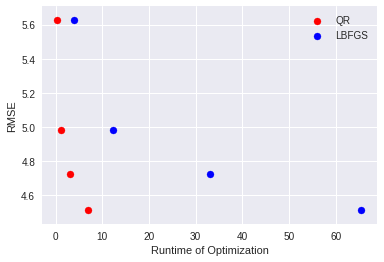

In [152]:
# Plots
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(*zip(*qr_results), color='red')
plt.scatter(*zip(*lbfgs_results), color='blue')
plt.xlabel('Runtime of Optimization')
plt.ylabel('RMSE')
plt.legend(['QR', 'LBFGS'])
plt.show()

The non-linear transformations do help to reduce the prediction error. The transformation maps our data to a much more high dimensional space and it helps capture non-linear relationships in our data that a linear model cannot capture. Since we tried out more non-linear relationships with the higher-dimensional maps, it makes sense that the RMSE on the test set got better as we had a greater chance of modeling the actual non-linear relationship between the X and y.



* Instead of using random, what if we treat
  $\mathbf{A}$ and $\mathbf{b}$ as another parameter for L-BFGS to optimize? 

In [159]:
# Example of how to setup LBFGS with multiple matrices.
class ModifiedLBFGS(object):
  def __init__(self, d, X, y, X_test, y_test):
    self.X = X
    self.y = y
    self.A = torch.randn((d, X.shape[1]), requires_grad=True, dtype=torch.double)
    self.b = torch.randn(d, requires_grad=True, dtype=torch.double)
    self.w = torch.zeros(d, requires_grad=True, dtype=torch.double)
    self.Xt = X_test
    self.yt = y_test
    self.opt = torch.optim.LBFGS([self.w, self.A, self.b])
  
  def black_box(self):
    self.opt.zero_grad()
    X_b = torch.cos(torch.add(torch.mm(self.X, self.A.t()), self.b))
    # print('X_b', X_b.shape)
    # print('self.y', self.y.shape)
    # print('self.w', self.w.shape)
    negative_log_posterior = sigma * torch.dot((self.y - torch.mv(X_b, self.w)), self.y - torch.mv(X_b, self.w)) + precision * torch.dot(self.w, self.w)
    negative_log_posterior.backward()    
    return negative_log_posterior
  
  def run(self):
    steps = 10
    for i in range(steps):
        self.opt.step(self.black_box)
    return self.w.detach()
  
  def calculate_rmse(self, w):
    X_b = torch.cos(torch.add(torch.mm(self.Xt, self.A.t()), self.b))
    return rmse(self.yt.detach(), w.detach(), X_b.detach())

In [161]:
# All of these were run with 10 steps in our optimizer
mod100 = ModifiedLBFGS(100, X_train_normalized, y_train, X_test_normalized, y_test)
w_mod100 = mod100.run()
mod200 = ModifiedLBFGS(200, X_train_normalized, y_train, X_test_normalized, y_test)
w_mod200 = mod200.run()
mod400 = ModifiedLBFGS(400, X_train_normalized, y_train, X_test_normalized, y_test)
w_mod400 = mod400.run()
mod600 = ModifiedLBFGS(600, X_train_normalized, y_train, X_test_normalized, y_test)
w_mod600 = mod600.run()

print('RMSE for 100 basis functions: ', mod100.calculate_rmse(w_mod100))
print('RMSE for 200 basis functions: ', mod200.calculate_rmse(w_mod200))
print('RMSE for 400 basis functions: ', mod400.calculate_rmse(w_mod400))
print('RMSE for 600 basis functions: ', mod600.calculate_rmse(w_mod600))

RMSE for 100 basis functions:  4.233767305972683
RMSE for 200 basis functions:  4.1310152918798835
RMSE for 400 basis functions:  4.120721325988428
RMSE for 600 basis functions:  4.1192373017304496


We see that we get even lower RMSEs when also optimize for the basis functions.